# Universidade de Fortaleza
## Mestrado em Informática Aplicada
### Ciência de Dados aplicada à Ciência da Cidade

# Facilities Optimization: Voronoi Diagrams for School Catchment Areas

## Introduction

Voronoi diagrams are a fundamental tool in computational geometry and spatial analysis. They partition a plane into regions based on distance to a specific set of points (called sites or seeds).

**Definition**: For a set of points P = {p₁, p₂, ..., pₙ}, the Voronoi region for point pᵢ consists of all locations in the plane that are closer to pᵢ than to any other point in P.

## Applications in Urban Science

- **Facility Location**: Determining service areas for facilities like schools, hospitals, fire stations, or airports
- **Resource Allocation**: Optimizing service coverage and accessibility
- **Urban Planning**: Analyzing accessibility and identifying underserved areas
- **Emergency Services**: Planning optimal locations for emergency response units
- **Education Planning**: School district boundary optimization

In [15]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
from matplotlib.patches import Circle
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

## Example: Five Schools and Their Catchment Areas

We'll simulate a scenario with five schools in an urban area and determine their catchment areas using Voronoi diagrams. This helps answer the question: "Which school should a student attend based on their home location?"

In [16]:
# Define school locations (in arbitrary coordinate system representing km)
schools = np.array([
    [2.0, 3.0],   # Lincoln Elementary
    [7.0, 5.0],   # Washington Middle School
    [4.0, 7.5],   # Roosevelt High School
    [8.5, 2.5],   # Jefferson Elementary
    [3.5, 1.0]    # Madison Primary
])

school_names = [
    'Lincoln Elementary',
    'Washington Middle',
    'Roosevelt High',
    'Jefferson Elementary',
    'Madison Primary'
]

school_codes = ['LIN', 'WSH', 'ROO', 'JEF', 'MAD']

print("School Locations:")
print("=" * 60)
for code, name, coords in zip(school_codes, school_names, schools):
    print(f"{code} - {name:25s}: ({coords[0]:.1f}, {coords[1]:.1f})")

School Locations:
LIN - Lincoln Elementary       : (2.0, 3.0)
WSH - Washington Middle        : (7.0, 5.0)
ROO - Roosevelt High           : (4.0, 7.5)
JEF - Jefferson Elementary     : (8.5, 2.5)
MAD - Madison Primary          : (3.5, 1.0)


## Computing the Voronoi Diagram

The Voronoi diagram divides the space into regions where each region contains all points closest to a particular school. With 5 schools, scipy's Voronoi function works perfectly.

In [17]:
# Compute Voronoi diagram for schools
vor = Voronoi(schools)

print("Voronoi Diagram Statistics:")
print(f"Number of schools (sites): {len(schools)}")
print(f"Number of Voronoi regions: {len(vor.regions)}")
print(f"Number of Voronoi vertices: {len(vor.vertices)}")
print(f"\nVoronoi vertices (points equidistant from 3+ schools):")
print(vor.vertices)
print(f"\nNote: Voronoi vertices represent locations that are equidistant")
print(f"from three or more schools - critical decision points!")

Voronoi Diagram Statistics:
Number of schools (sites): 5
Number of Voronoi regions: 6
Number of Voronoi vertices: 3

Voronoi vertices (points equidistant from 3+ schools):
[[4.21621622 4.70945946]
 [4.71153846 3.47115385]
 [5.75847458 2.55508475]]

Note: Voronoi vertices represent locations that are equidistant
from three or more schools - critical decision points!


## Visualization: Basic Voronoi Diagram

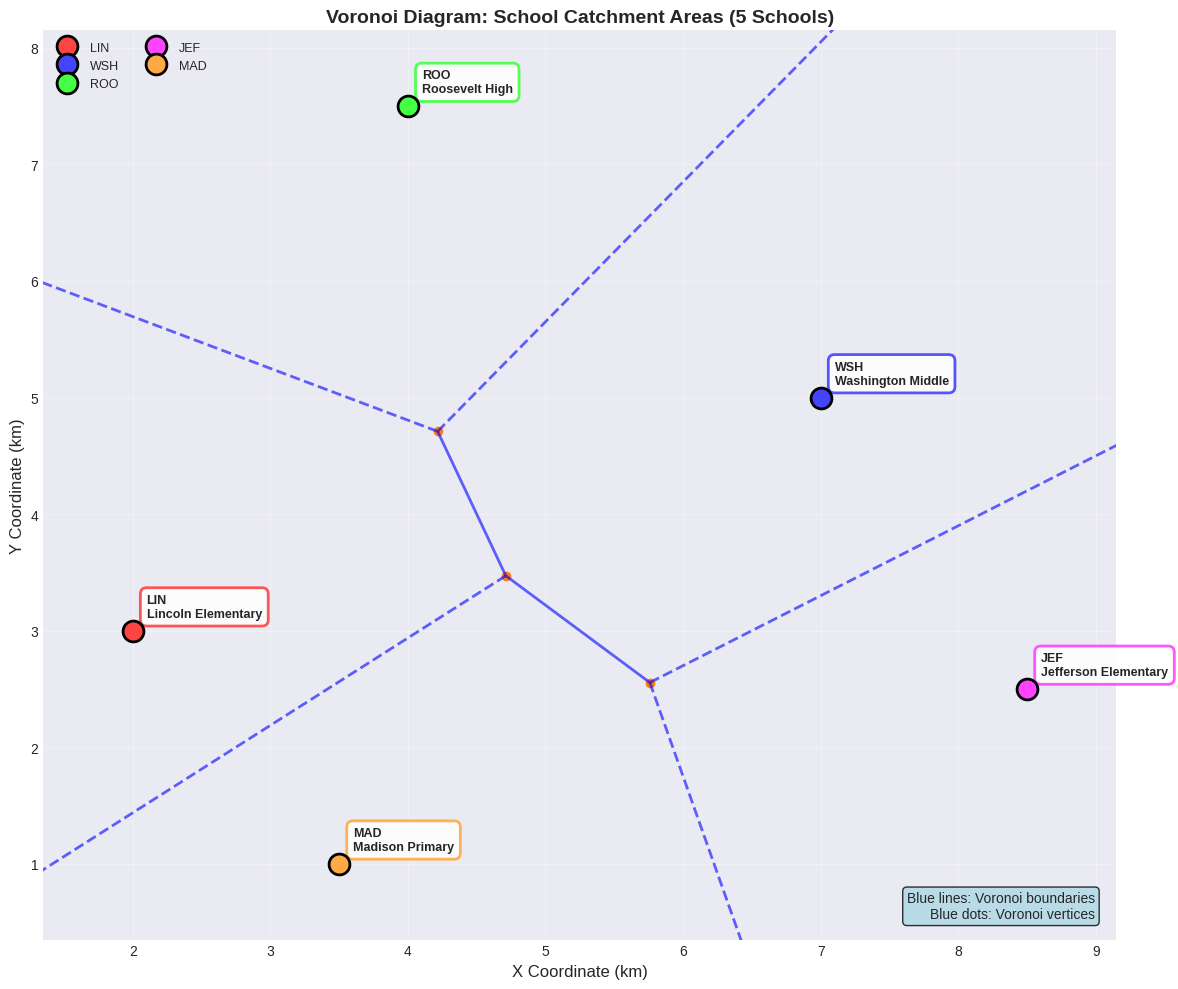

In [18]:
# Create basic Voronoi diagram
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot Voronoi diagram
voronoi_plot_2d(vor, ax=ax, show_vertices=True, line_colors='blue', 
                line_width=2, line_alpha=0.6, point_size=10)

# Highlight schools
school_colors = ['#FF4444', '#4444FF', '#44FF44', '#FF44FF', '#FFAA44']
for i, (name, code, color) in enumerate(zip(school_names, school_codes, school_colors)):
    ax.plot(schools[i, 0], schools[i, 1], 'o', color=color, markersize=15, 
            markeredgecolor='black', markeredgewidth=2, label=f'{code}', zorder=5)
    ax.annotate(f'{code}\n{name}', (schools[i, 0], schools[i, 1]), 
                xytext=(10, 10), textcoords='offset points',
                fontsize=9, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.5', facecolor='white', 
                         edgecolor=color, linewidth=2, alpha=0.9))

ax.set_xlabel('X Coordinate (km)', fontsize=12)
ax.set_ylabel('Y Coordinate (km)', fontsize=12)
ax.set_title('Voronoi Diagram: School Catchment Areas (5 Schools)', 
             fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.legend(loc='upper left', fontsize=9, ncol=2)

# Add explanation
textstr = 'Blue lines: Voronoi boundaries\nBlue dots: Voronoi vertices'
props = dict(boxstyle='round', facecolor='lightblue', alpha=0.8)
ax.text(0.98, 0.02, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='bottom', horizontalalignment='right', bbox=props)

plt.tight_layout()
plt.show()

## Enhanced Visualization with Catchment Areas

Let's create a more detailed visualization showing which areas are served by each school.

In [19]:
# Create a grid of points to determine catchment areas
x_min, x_max = 0, 10
y_min, y_max = 0, 9
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# For each point in the grid, find the closest school
grid_points = np.c_[xx.ravel(), yy.ravel()]
distances = np.zeros((len(grid_points), len(schools)))

for i, school in enumerate(schools):
    distances[:, i] = np.sqrt(np.sum((grid_points - school)**2, axis=1))

# Assign each point to the closest school
closest_school = np.argmin(distances, axis=1)
closest_school = closest_school.reshape(xx.shape)

print(f"Grid resolution: {xx.shape}")
print(f"Total points analyzed: {len(grid_points):,}")

Grid resolution: (300, 300)
Total points analyzed: 90,000


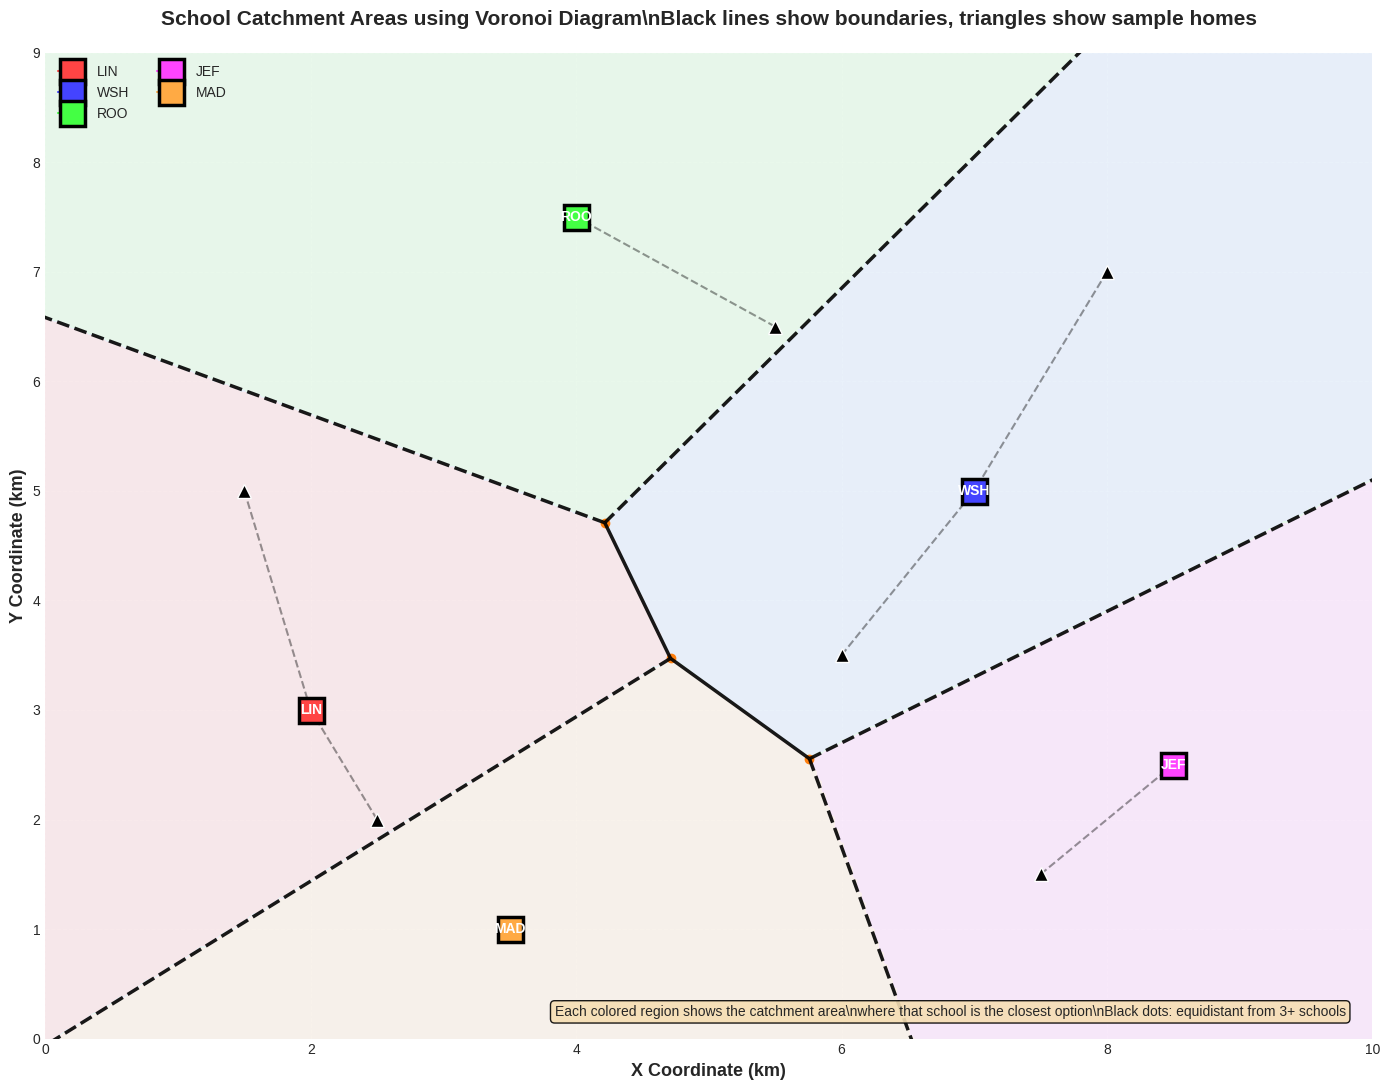

In [20]:
# Create enhanced visualization
fig, ax = plt.subplots(1, 1, figsize=(14, 11))

# Plot catchment areas with color coding
colors = ['#FFE5E5', '#E5F2FF', '#E5FFE5', '#FFE5FF', '#FFF5E5']
contour = ax.contourf(xx, yy, closest_school, levels=len(schools)-1, 
                      colors=colors, alpha=0.6)

# Plot Voronoi boundaries
voronoi_plot_2d(vor, ax=ax, show_vertices=True, line_colors='black', 
                line_width=2.5, line_alpha=0.9, point_size=8)

# Plot schools with distinct markers
school_colors = ['#FF4444', '#4444FF', '#44FF44', '#FF44FF', '#FFAA44']
for i, (name, code, color) in enumerate(zip(school_names, school_codes, school_colors)):
    ax.plot(schools[i, 0], schools[i, 1], marker='s', 
            color=color, markersize=18, label=f'{code}',
            markeredgecolor='black', markeredgewidth=2.5, zorder=5)
    ax.annotate(f'{code}', (schools[i, 0], schools[i, 1]), 
                xytext=(0, 0), textcoords='offset points',
                fontsize=10, fontweight='bold', color='white',
                ha='center', va='center', zorder=6)

# Add sample home locations to show which school they're closest to
sample_homes = np.array([
    [1.5, 5.0],
    [5.5, 6.5],
    [6.0, 3.5],
    [8.0, 7.0],
    [2.5, 2.0],
    [7.5, 1.5]
])

for home in sample_homes:
    # Calculate distance to each school
    dists = [np.sqrt(np.sum((home - school)**2)) for school in schools]
    closest = np.argmin(dists)
    ax.plot(home[0], home[1], 'k^', markersize=10, zorder=4, 
            markeredgecolor='white', markeredgewidth=1)
    ax.plot([home[0], schools[closest, 0]], 
            [home[1], schools[closest, 1]], 
            'k--', alpha=0.4, linewidth=1.5, zorder=3)

ax.set_xlabel('X Coordinate (km)', fontsize=13, fontweight='bold')
ax.set_ylabel('Y Coordinate (km)', fontsize=13, fontweight='bold')
ax.set_title('School Catchment Areas using Voronoi Diagram\\nBlack lines show boundaries, triangles show sample homes', 
             fontsize=15, fontweight='bold', pad=20)
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.grid(True, alpha=0.3, linestyle='--')
ax.legend(loc='upper left', fontsize=10, framealpha=0.95, ncol=2)

# Add text explanation
textstr = 'Each colored region shows the catchment area\\nwhere that school is the closest option\\nBlack dots: equidistant from 3+ schools'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.9)
ax.text(0.98, 0.02, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='bottom', horizontalalignment='right', bbox=props)

plt.tight_layout()
plt.show()

## Analysis: Catchment Area Statistics

Let's analyze the service areas quantitatively.

In [21]:
# Calculate catchment area statistics
area_per_school = []
for i in range(len(schools)):
    area = np.sum(closest_school == i)
    area_per_school.append(area)

total_area = np.sum(area_per_school)

print("Catchment Area Analysis:")
print("=" * 70)
for i, (code, name, area) in enumerate(zip(school_codes, school_names, area_per_school)):
    percentage = (area / total_area) * 100
    print(f"{code} - {name:25s}: {percentage:5.1f}% of total area")

print(f"\\nTotal grid points: {total_area:,}")

# Calculate average distances between schools
print("\\n" + "=" * 70)
print("Distance Matrix (km):")
print("=" * 70)
print(f"{'':15s}", end='')
for code in school_codes:
    print(f"{code:>8s}", end='')
print()

for i, code_i in enumerate(school_codes):
    print(f"{code_i:15s}", end='')
    for j, code_j in enumerate(school_codes):
        if i == j:
            print(f"    -   ", end='')
        else:
            dist = np.linalg.norm(schools[i] - schools[j])
            print(f"{dist:8.2f}", end='')
    print()

# Find Voronoi vertices (triple points)
print(f"\\n{'=' * 70}")
print(f"Voronoi Vertices (equidistant from 3+ schools):")
print(f"{'=' * 70}")
for i, vertex in enumerate(vor.vertices):
    print(f"Vertex {i+1}: ({vertex[0]:.2f}, {vertex[1]:.2f})")

Catchment Area Analysis:
LIN - Lincoln Elementary       :  19.8% of total area
WSH - Washington Middle        :  25.5% of total area
ROO - Roosevelt High           :  24.2% of total area
JEF - Jefferson Elementary     :  17.0% of total area
MAD - Madison Primary          :  13.5% of total area
\nTotal grid points: 90,000
\n======================================================================
Distance Matrix (km):
                    LIN     WSH     ROO     JEF     MAD
LIN                -       5.39    4.92    6.52    2.50
WSH                5.39    -       3.91    2.92    5.32
ROO                4.92    3.91    -       6.73    6.52
JEF                6.52    2.92    6.73    -       5.22
MAD                2.50    5.32    6.52    5.22    -   
\n======================================================================
Voronoi Vertices (equidistant from 3+ schools):
Vertex 1: (4.22, 4.71)
Vertex 2: (4.71, 3.47)
Vertex 3: (5.76, 2.56)


## Practical Implications for Urban Planning

### Key Insights:

1. **Optimal Assignment**: The Voronoi diagram provides the optimal assignment of students to schools based on proximity (Euclidean distance).

2. **Service Equity**: Students living on Voronoi boundaries have equal access to multiple schools.

3. **Capacity Planning**: If population density is uniform, each school should have capacity proportional to its catchment area.

4. **Voronoi Vertices**: These critical points are equidistant from 3 or more schools - ideal locations for monitoring coverage or placing additional facilities.

### Educational Planning Applications:

- **School District Boundaries**: Natural boundaries for school assignments
- **New School Location**: Identify underserved areas (large Voronoi regions)
- **Transportation Planning**: Optimize bus routes within catchment areas
- **Enrollment Forecasting**: Predict student numbers based on catchment area demographics

### Limitations:

- Assumes Euclidean distance (straight-line)
- Doesn't account for transportation networks (roads, public transit, walking paths)
- Ignores barriers (highways, rivers, railways)
- Doesn't consider school capacity, quality, or grade levels
- Population distribution may not be uniform
- Doesn't account for school choice policies or magnet schools

### Extensions for Real-World Use:

- **Weighted Voronoi**: Account for school capacity or quality ratings
- **Network Voronoi**: Use actual walking/driving distances along streets
- **Constrained Voronoi**: Incorporate administrative boundaries or natural barriers
- **Dynamic Voronoi**: Consider time-varying factors (traffic, safety, after-school programs)
- **3D Voronoi**: Include travel time as the third dimension

## Interactive Example: Find Nearest School

Let's create a function to determine which school serves any given location.

In [22]:
def find_nearest_school(location, schools, school_names):
    """
    Determine which school is closest to a given location.
    
    Parameters:
    -----------
    location : array-like
        [x, y] coordinates of the home location
    schools : np.ndarray
        Array of school coordinates
    school_names : list
        List of school names
    
    Returns:
    --------
    tuple : (nearest_school_name, distance, all_distances)
    """
    location = np.array(location)
    distances = [np.linalg.norm(location - school) for school in schools]
    nearest_idx = np.argmin(distances)
    
    return school_names[nearest_idx], distances[nearest_idx], distances

# Test with several home locations
test_homes = [
    ([1.0, 2.0], "Southwest neighborhood"),
    ([5.0, 5.0], "City center"),
    ([9.0, 7.0], "Northeast district"),
    ([4.0, 2.5], "South-central area"),
    ([6.5, 6.0], "North-central area")
]

print("Home Location Analysis:")
print("=" * 80)
for coords, description in test_homes:
    nearest, dist, all_dists = find_nearest_school(coords, schools, school_codes)
    print(f"\\nHome: {description} at ({coords[0]:.1f}, {coords[1]:.1f})")
    print(f"Assigned school: {nearest} (distance: {dist:.2f} km)")
    print(f"All distances:")
    for code, d in zip(school_codes, all_dists):
        marker = " ← NEAREST" if code == nearest else ""
        print(f"  - {code}: {d:.2f} km{marker}")
        
# Calculate which home is farthest from its nearest school
print(f"\\n{'=' * 80}")
print("Analysis: Maximum travel distance to nearest school")
max_dist = 0
max_location = None
for home, desc in test_homes:
    nearest, dist, _ = find_nearest_school(home, schools, school_codes)
    if dist > max_dist:
        max_dist = dist
        max_location = (home, desc)
        
print(f"Location with longest travel: {max_location[1]}")
print(f"Distance to nearest school: {max_dist:.2f} km")
print(f"This might indicate an underserved area!")

Home Location Analysis:
\nHome: Southwest neighborhood at (1.0, 2.0)
Assigned school: LIN (distance: 1.41 km)
All distances:
  - LIN: 1.41 km ← NEAREST
  - WSH: 6.71 km
  - ROO: 6.26 km
  - JEF: 7.52 km
  - MAD: 2.69 km
\nHome: City center at (5.0, 5.0)
Assigned school: WSH (distance: 2.00 km)
All distances:
  - LIN: 3.61 km
  - WSH: 2.00 km ← NEAREST
  - ROO: 2.69 km
  - JEF: 4.30 km
  - MAD: 4.27 km
\nHome: Northeast district at (9.0, 7.0)
Assigned school: WSH (distance: 2.83 km)
All distances:
  - LIN: 8.06 km
  - WSH: 2.83 km ← NEAREST
  - ROO: 5.02 km
  - JEF: 4.53 km
  - MAD: 8.14 km
\nHome: South-central area at (4.0, 2.5)
Assigned school: MAD (distance: 1.58 km)
All distances:
  - LIN: 2.06 km
  - WSH: 3.91 km
  - ROO: 5.00 km
  - JEF: 4.50 km
  - MAD: 1.58 km ← NEAREST
\nHome: North-central area at (6.5, 6.0)
Assigned school: WSH (distance: 1.12 km)
All distances:
  - LIN: 5.41 km
  - WSH: 1.12 km ← NEAREST
  - ROO: 2.92 km
  - JEF: 4.03 km
  - MAD: 5.83 km
\n=================

## Conclusion

Voronoi diagrams provide a powerful tool for facilities optimization in urban planning:

### Summary:

- **Optimal Partitioning**: Automatically divides service area based on proximity
- **Spatial Analysis**: Identifies coverage gaps and service overlap
- **Decision Support**: Helps determine optimal facility locations
- **Scalable**: Works from 2 facilities (simple bisector) to hundreds

### Key Takeaways for School Planning:

1. **Fair Access**: Voronoi boundaries ensure students attend the nearest school
2. **Capacity Planning**: Catchment area size indicates required school capacity
3. **New Facilities**: Large Voronoi regions suggest need for new schools
4. **Transportation**: Boundaries help optimize school bus routes

### Beyond Schools:

This approach applies to any urban facility:
- Hospitals and healthcare centers
- Fire stations and police stations
- Parks and recreational facilities
- Libraries and community centers
- Retail locations and service centers

### Implementation Notes:

- `scipy.spatial.Voronoi` works well with ≥4 points
- For real-world applications, consider network distances (roads) not just Euclidean
- Can be extended with weights for capacity, quality, or service differentiation
- Combine with population density data for more accurate planning